In [1]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import keras
import numpy as np

In [3]:
from keras.datasets import mnist
(train_images, train_lables), (test_images, test_lables) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

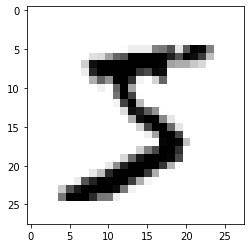

In [8]:
digit = train_images[0]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [9]:
origin_my_image = test_images[0]

In [10]:
from keras import models
from keras import layers

In [11]:
# 'relu' 함수는 의미없는 값을 삭제하는 함수를 말함

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(layers.Dense(256, activation='relu', ))
model.add(layers.Dense(128, activation='relu', ))
model.add(layers.Dense(64, activation='relu', ))

model.add(layers.Dense(10, activation='softmax'))

In [12]:
# optimizer 중에 adam 이 가장많이 쓰는듯 여기서는 rmsprop 함수를 쓴다.

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255     # 0~255 값을 255로 나눠서 0~1 로 만듬
train_images.shape

(60000, 784)

In [14]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [15]:
from keras.utils import to_categorical
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
train_lables = to_categorical(train_lables)     # 행렬 연산을 위해 사용하는 함수이다. 데이터를 2차원적으로 보여줌. 위의 0은 밑에 2번째 행에서 첫번째에 해당하는게 1이다 라는 걸 의미.
train_lables

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
test_lables = to_categorical(test_lables)

In [18]:
model.fit(train_images, train_lables, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.4982 - accuracy: 0.8404
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1005 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0640 - accuracy: 0.9812
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0368 - accuracy: 0.9890


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9807


In [20]:
test_acc

0.9807000160217285

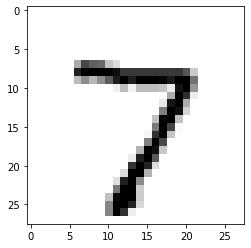

In [25]:
myDigit = origin_my_image
plt.imshow(myDigit, cmap=plt.cm.binary)

In [28]:
my_image = digit.reshape((1, 28*28))
output= model.predict(my_image)
print('result: ', np.argmax(output))

result:  5


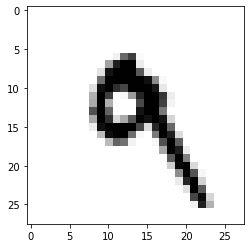

In [34]:
(ti, tl), (testi, testl) = mnist.load_data()
plt.imshow(testi[7], cmap=plt.cm.binary)

In [35]:
output = model.predict(testi[7].reshape((1,28*28)))
print('result: ', np.argmax(output))

result:  9


In [38]:
img = Image.open('3.jpg')            # 결과값의 처음과 두번째는 가로세로 이고 뒤에 3은 RGB를 나타낸것이다.
img = img.resize((28,28))
img_data = np.array(img)
img_data.shape

(28, 28, 3)

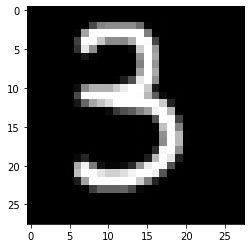

In [39]:
plt.imshow(img_data)

In [42]:
trans_img = img_data.transpose(2,0,1)      # 아까 위에서 썻던 shape의 결과값중에 (0,1,2) 순서를 (2,0,1)로 바꾼것
trans_img.shape

(3, 28, 28)

In [43]:
np.savetxt("image.csv", trans_img[0], delimiter=',')

In [44]:
trans_test_img = trans_img[0].reshape((1,28*28))
trans_test_omg = trans_test_img.astype('float32')/255

In [45]:
output = model.predict(trans_test_img)
print('결과는 : ', np.argmax(output))

결과는 :  3


In [46]:
output

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)